In [35]:
import numpy as np
import networkx as nx

#generalised laplacian matrix using social distance approach
def genlaplacian(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -D[i,j]*(pow(x, (D[i,j]-1)))
            D[i,i] = -1*(D[i].sum())
    return D

In [36]:
import networkx as nx
import numpy as np
import itertools 

#function to compute k-path transformed laplacian based on the laplace 
#transform with lambda parameter
def Genlaplacian_laplace(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [37]:
#function to compute k-path transformed laplacian based on the mellin
#transform with s parameter
def Genlaplacian_mellin(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [38]:
import random

rand_lst = [ random.randint(1, 10) for i in range(0,10)]
print(rand_lst)

[6, 5, 2, 5, 4, 1, 6, 3, 8, 10]


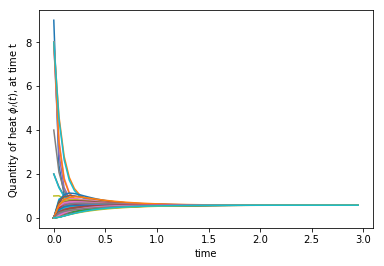

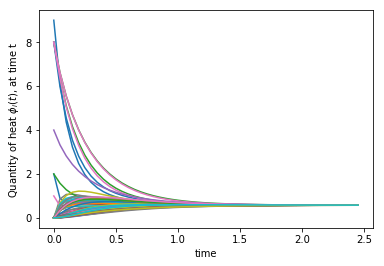

In [39]:
-

#with open('Barabasi.csv', "w") as output:
    #writer = csv.writer(output, lineterminator='\n')
    #writer.writerows(phi_lst)    



plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-degree.eps', format='eps', dpi=1000)
plt.show()

phi_0 = [0]*n

j=0
for r in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
    phi_0[r] = rand_lst[j]
    j = j+1


phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,2.5,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-random.eps', format='eps', dpi=1000)
plt.show()

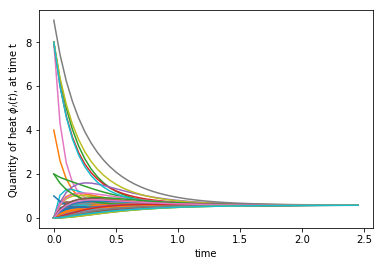

In [40]:

phi_0 = [0]*n

j=0
for r in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
    phi_0[r] = rand_lst[j]
    j = j+1

L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions

D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,2.5,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.show()

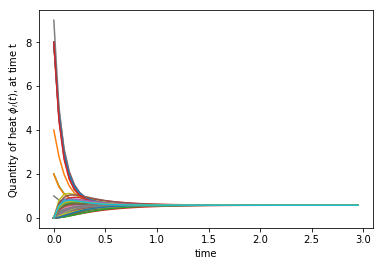

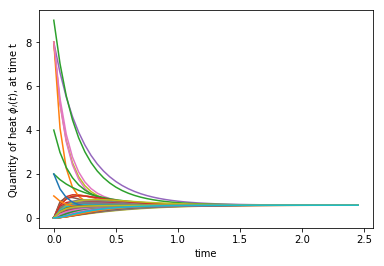

In [41]:

###Mellin transform diffusion for ER network####

import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools

n=100
p =0.09
Gr = nx.gnp_random_graph(n, p, seed=None, directed=False)     #Create Barabasi network
while (nx.is_connected(Gr)==False):                      # check if network is connected
    Gr = nx.gnp_random_graph(n, p, seed=None, directed=False)

Deg_lst = list(nx.degree_centrality(Gr).values())
sel_index = np.argsort(Deg_lst)[-10:]
phi_0 = [0]*n

j =0
for i in sel_index:                        #set intitial heat content, phi_0 by random values
    phi_0[i] = rand_lst[j]
    j = j+1



Lr = nx.laplacian_matrix(Gr).todense()   # to cater for no longrange interactions
D, V = LA.eigh(Lr);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,3.0,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/ER-degree.eps', format='eps', dpi=1000)
plt.show()

phi_0 = [0]*n

j=0
for r in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
    phi_0[r] = rand_lst[j]
    j = j+1

phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors
    
    
#plotting results
phi_lst=[]   
time = np.arange(0,2.5,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/ER-random.eps', format='eps', dpi=1000)
plt.show()

In [7]:
import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import numpy as np

rand_lst = [random.randint(1, 10) for i in range(0,10)]
time = np.arange(0,0.5,0.005)
timer = np.arange(0,4.0,0.05)
nt = len(time)
ntr = len(timer)
inter = 50

n=1000

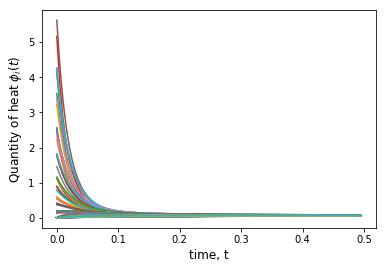

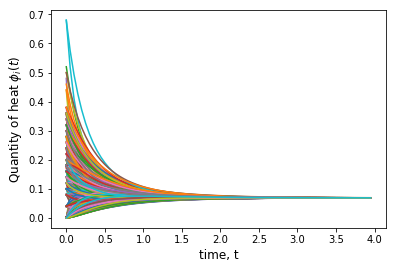

5.982000000000002


In [8]:

###diffusion on Barabasi network with random source nodes and highest degree nodes####

#m=5
m=3

data_arr = np.zeros((inter,nt,n))
datar_arr = np.zeros((inter,ntr,n))
pt_len =[]
av_lst=[]

for g in range(inter):

    G = nx.barabasi_albert_graph(n, m, seed=None)     #Create Barabasi network
    while (nx.is_connected(G)==False):                # check if network is connecte
        G = nx.barabasi_albert_graph(n, m, seed=None)

    pt_len.append(nx.average_shortest_path_length(G))
    
    deg = list(G.degree)
    avedegree = np.mean([d[1] for d in deg])          # compute average degree
    av_lst.append(avedegree)
    
    L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    
    #select highest degree nodes
    Deg_lst = list(nx.degree_centrality(G).values())
    sel_index = np.argsort(Deg_lst)[-10:]
    phi_0 = [0]*n

    j =0
    for i in sel_index:                        #set intitial heat content, phi_0 by random values
        phi_0[i] = rand_lst[j]
        j = j+1

    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phi_lst=[]   
    tt=0
    for t in time :                             #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
        Phi = np.dot(V,Phi);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        data_arr[g,tt]= (Phi.ravel()).tolist()
        tt = tt+1
     
    #select random source nodes
    phir_0 = [0]*n
    jr=0
    for rr in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
        phir_0[rr] = rand_lst[jr]
        jr = jr+1

    phir_0 = np.reshape(phir_0,(n,1), order='F');
    phir_0V = np.dot((V.conj().transpose()),phir_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phir_lst=[]   
    tr=0
    for t in timer :                             #Loop through times and decay each initial component
        Phir = (phir_0V* (np.exp(-D*t)));         #Exponential decay for each component
        Phir = np.dot(V,Phir);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        datar_arr[g,tr]= (Phir.ravel()).tolist()
        tr = tr+1
     
        
ln = len(data_arr)
sum_arr = np.zeros((nt,n))
for k in range(ln):
    sum_arr = sum_arr + data_arr[k]
sum_av = np.multiply(sum_arr,(1.0/inter))


plt.plot(time,sum_av.tolist())
plt.xlabel('time, t', fontsize=12)
plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-degreesource.eps', format='eps', dpi=1000)
plt.show()

lnr = len(datar_arr)
sumr_arr = np.zeros((ntr,n))
for kr in range(lnr):
    sumr_arr = sumr_arr + datar_arr[kr]
sumr_av = np.multiply(sumr_arr,(1.0/inter))


plt.plot(timer,sumr_av.tolist())
plt.xlabel('time, t', fontsize=12)
plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-randomsource.eps', format='eps', dpi=1000)
plt.show()
#print(pt_len)
print(np.mean(av_lst))

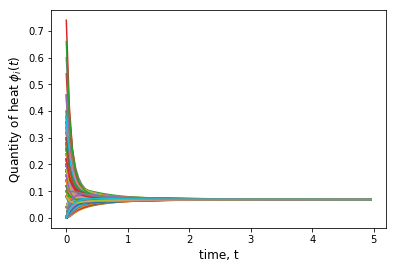

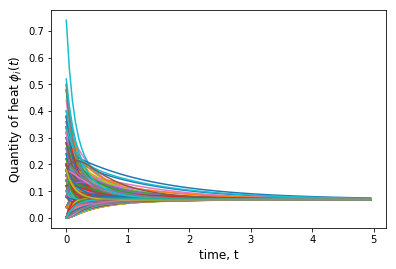

5.982000000000002


In [9]:
##ER 

time = np.arange(0,5.0,0.05)
timer = np.arange(0,5.0,0.05)
nt = len(time)
ntr = len(timer)
inter = 50

n=1000
#p =0.015
p=0.006

data_arr = np.zeros((inter,nt,n))
datar_arr = np.zeros((inter,ntr,n))
pt_len = []
av_lst = []

for g in range(inter):
    G = nx.gnp_random_graph(n, p, seed=None, directed=False)     #Create Barabasi network
    while (nx.is_connected(G)==False):                      # check if network is connected
        G = nx.gnp_random_graph(n, p, seed=None, directed=False)

    pt_len.append(nx.average_shortest_path_length(G))
    
    eg = list(G.degree)
    avedegree = np.mean([d[1] for d in deg])          # compute average degree
    av_lst.append(avedegree)
    
    L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    
    #select highest degree nodes
    Deg_lst = list(nx.degree_centrality(G).values())
    sel_index = np.argsort(Deg_lst)[-10:]
    phi_0 = [0]*n

    j =0
    for i in sel_index:                        #set intitial heat content, phi_0 by random values
        phi_0[i] = rand_lst[j]
        j = j+1

    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phi_lst=[]   
    tt=0
    for t in time :                             #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
        Phi = np.dot(V,Phi);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        data_arr[g,tt]= (Phi.ravel()).tolist()
        tt = tt+1
     
    #select random source nodes
    phir_0 = [0]*n
    jr=0
    for rr in random.sample(range(0,n-1), 10):                        #set intitial heat content, phi_0 by random values
        phir_0[rr] = rand_lst[jr]
        jr = jr+1

    phir_0 = np.reshape(phir_0,(n,1), order='F');
    phir_0V = np.dot((V.conj().transpose()),phir_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phir_lst=[]   
    tr=0
    for t in timer :                             #Loop through times and decay each initial component
        Phir = (phir_0V* (np.exp(-D*t)));         #Exponential decay for each component
        Phir = np.dot(V,Phir);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        datar_arr[g,tr]= (Phir.ravel()).tolist()
        tr = tr+1
     
        
ln = len(data_arr)
sum_arr = np.zeros((nt,n))
for k in range(ln):
    sum_arr = sum_arr + data_arr[k]
sum_av = np.multiply(sum_arr,(1.0/inter))


plt.plot(time,sum_av.tolist())
plt.xlabel('time, t', fontsize=12)
plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/ER-degreesource.eps', format='eps', dpi=1000)
plt.show()

lnr = len(datar_arr)
sumr_arr = np.zeros((ntr,n))
for kr in range(lnr):
    sumr_arr = sumr_arr + datar_arr[kr]
sumr_av = np.multiply(sumr_arr,(1.0/inter))


plt.plot(timer,sumr_av.tolist())
plt.xlabel('time, t', fontsize=12)
plt.ylabel('Quantity of heat $\phi_i(t)$', fontsize=12)
#plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/ER-randomsource2.eps', format='eps', dpi=1000)
plt.show()
#print(pt_len)
print(np.mean(av_lst))

In [6]:
import networkx as nx
import numpy as np

n=1000
m=3

G = nx.barabasi_albert_graph(n, m, seed=None)     #Create Barabasi network
while (nx.is_connected(G)==False):                # check if network is connecte
    G = nx.barabasi_albert_graph(n, m, seed=None)

deg = list(G.degree)
avedegree = np.mean([d[1] for d in deg])          # compute average degree
print(avedegree)

5.982


In [11]:
n=1000
p =0.006


G = nx.gnp_random_graph(n, p, seed=None, directed=False)     #Create Barabasi network
while (nx.is_connected(G)==False):                      # check if network is connected
    G = nx.gnp_random_graph(n, p, seed=None, directed=False)
    
deg = list(G.degree)
avedegree = np.mean([d[1] for d in deg])          # compute average degree
print(avedegree)

6.016
